In [107]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from cnn_from_scratch import loss_function
reload(loss_function)
from cnn_from_scratch import neuron
reload(neuron)
from cnn_from_scratch import layer
reload(layer)
from cnn_from_scratch import model
reload(model)
from cnn_from_scratch import datasets
reload(datasets)
from cnn_from_scratch.model import CNN_Model
from cnn_from_scratch.layer import DenseLayer
from cnn_from_scratch.loss_function import LogLoss
from cnn_from_scratch.datasets import load_mnist, show_mnist_digit
# Only flow check now.

x_train, y_train, x_test, y_test = load_mnist()

"""
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:1000]
y_test = y_test[:1000]
"""

print(x_train.shape, y_train.shape)

(60000, 784) (60000, 10)


Iteration 1, loss = 2.08705519
Iteration 1, loss = 1.23065228
Iteration 1, loss = 0.75607099
Iteration 1, loss = 0.57267789
Iteration 1, loss = 0.48257247
Iteration 1, loss = 0.42683889
Iteration 1, loss = 0.38754509
Iteration 1, loss = 0.35769355
Iteration 1, loss = 0.33390796
Iteration 1, loss = 0.31413755
Iteration 1, loss = 0.29721091
Iteration 1, loss = 0.28229830
Iteration 1, loss = 0.26898401
Iteration 1, loss = 0.25698149
Iteration 1, loss = 0.24597300
Iteration 1, loss = 0.23588551
Iteration 1, loss = 0.22645792
Iteration 1, loss = 0.21765850
Iteration 1, loss = 0.20944663
Iteration 1, loss = 0.20175418
MLPClassifier Final train accuracy: 95.35%
MLPClassifier Final train loss: 0.202


Text(0.5, 1.0, 'MLP Accuracy Curve')

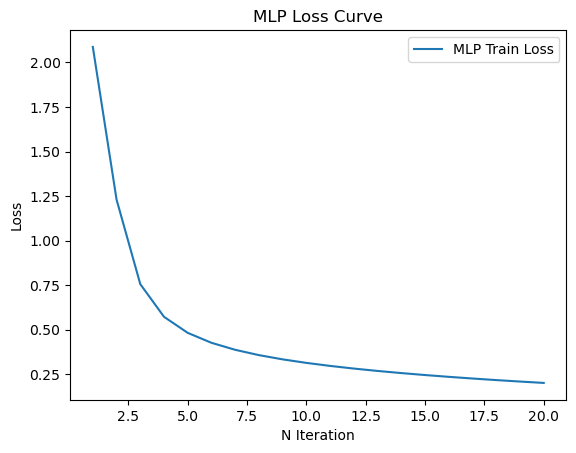

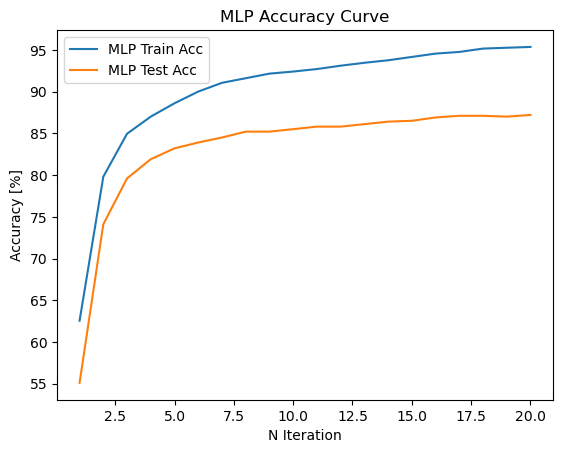

In [50]:
# Benchmark performance with sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Inputs that should match my from_scratch model
max_iter = 20
hidden_layer_sizes = [64]
learning_rate_init = 1e-2
batch_size = 100
activation = 'relu'

# Train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=0.,
                    solver='sgd', verbose=True, random_state=1, batch_size=batch_size,
                    activation=activation, learning_rate_init=learning_rate_init)

mlp_train_acc_arr = []
mlp_test_acc_arr = []
classes = [num for num in range(10)]
for i in range(max_iter):
    mlp.partial_fit(x_train, y_train.argmax(axis=1), classes=classes)
    mlp_train_acc_arr.append(mlp.score(x_train, y_train.argmax(axis=1)))
    mlp_test_acc_arr.append(mlp.score(x_test, y_test.argmax(axis=1)))

# Predict and evaluate
final_loss = mlp.loss_
print(f"MLPClassifier Final train accuracy: {mlp_train_acc_arr[-1] * 100:.2f}%")
print(f"MLPClassifier Final train loss: {final_loss:.3f}")

loss_curve = mlp.loss_curve_
plt.close('all')
plt.figure()
plt.plot(np.arange(len(loss_curve)) + 1, loss_curve, label='MLP Train Loss')
plt.xlabel('N Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('MLP Loss Curve')

plt.figure()
plt.plot(np.arange(len(loss_curve)) + 1, np.array(mlp_train_acc_arr) * 100, label='MLP Train Acc')
plt.plot(np.arange(len(loss_curve)) + 1, np.array(mlp_test_acc_arr) * 100, label='MLP Test Acc')
plt.xlabel('N Iteration')
plt.ylabel('Accuracy [%]')
plt.legend()
plt.title('MLP Accuracy Curve')


# CNN_trainer NaiveTrainer, Epoch: 1/20 Step - Train loss = 0.654; Test loss = 0.654
                                                   Train acc = 10.2%; Test acc = 10.6% - 15:03:38
# CNN_trainer NaiveTrainer, Epoch: 2/20 Step - Train loss = 0.617; Test loss = 0.619
                                                   Train acc = 10.9%; Test acc = 11.9% - 15:03:39
# CNN_trainer NaiveTrainer, Epoch: 3/20 Step - Train loss = 0.579; Test loss = 0.583
                                                   Train acc = 11.9%; Test acc = 11.4% - 15:03:40
# CNN_trainer NaiveTrainer, Epoch: 4/20 Step - Train loss = 0.542; Test loss = 0.548
                                                   Train acc = 13.3%; Test acc = 12.2% - 15:03:41
# CNN_trainer NaiveTrainer, Epoch: 5/20 Step - Train loss = 0.507; Test loss = 0.514
                                                   Train acc = 14.6%; Test acc = 13.1% - 15:03:41
# CNN_trainer NaiveTrainer, Epoch: 6/20 Step - Train loss = 0.475; Test loss = 0.483


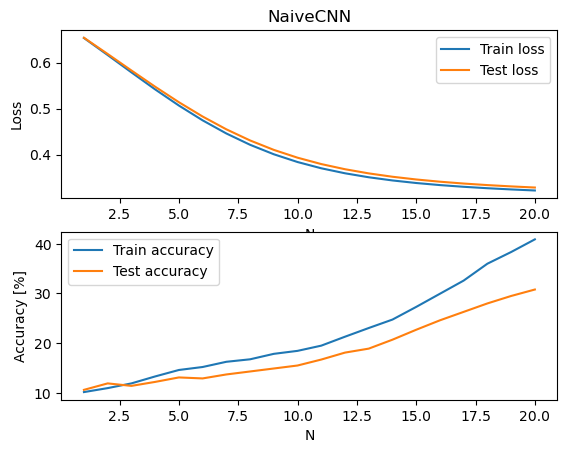

In [106]:
from cnn_from_scratch.trainer import CNN_trainer

my_trainer = CNN_trainer(loss_func=None, name='NaiveTrainer', quiet=True)
my_trainer.set_data(x_train, y_train, x_test, y_test)
my_trainer.naive_model(784, 10, [64])
my_trainer.train_model(reset_history=False, do_acc=True, learning_rate=1e-2, batch_size=10, n_epoch=20)


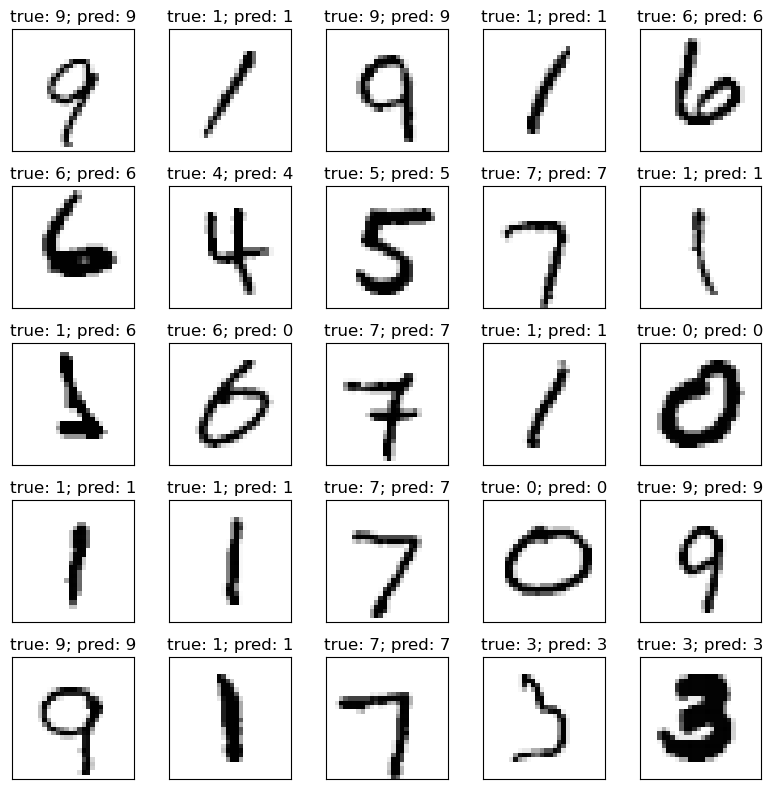

In [46]:
from cnn_from_scratch import datasets
reload(datasets)
from cnn_from_scratch.datasets import mnist_model_examination

mnist_model_examination(my_trainer, x_test, y_test)